In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Size of the house (in 1000 sqft)
x_train = [1,1.5,2,2.5,3,3.5,4,5]
#Price of the house (in 1000s of dollars)
y_train = [1,1.9,2,3,5,3,4,6]

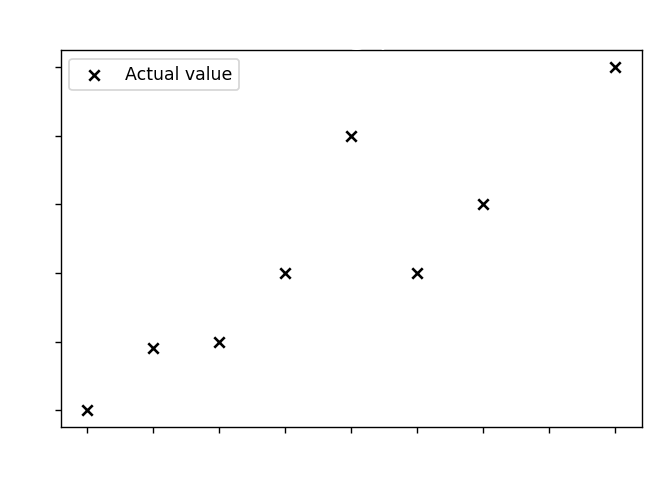

In [3]:
plt.figure(dpi= 125 )

plt.scatter(x_train, y_train,label = 'Actual value', marker='x',c= "black")

plt.title("Housing price",fontdict={"fontname":'comic sans ms','fontsize':20},color = 'white')
plt.xlabel('Size (1000 sqft)',c = 'w')
plt.ylabel('Price (in 1000s of dollars)',c = 'w')

plt.xticks(c = 'w')
plt.yticks(c = 'w')

plt.legend()
plt.show()

# Modle

In [4]:
def modle_output_predicition (x,w,b):
    f_wb = []
    for i in range(len(x)):
        f_wb.append(w * x[i] + b)
    return f_wb

# Square error cost function 
<a name="toc_40291_2.1"></a>
The linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b $$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [5]:
"""
x is input feature list and it's length is the number of trainig examples 
y is the actual output values corresponding to x 
w&b here are the initial values of model parameters 
note: the square error cost function has a convex shape
"""
def cost_function (x,y,w,b):
    m = len(x)
    cost = []
    f_wb = modle_output_predicition(x,w,b) # y_hat = F_wp is a list of predictions for each value of x in x_train
    for i in range(m):
        cost.append((f_wb[i] - y[i])**2)
    return sum(cost)/(2*m)
    

# Gradient 
 
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [6]:
"""
x is input feature list and it's length is the number of trainig examples 
y is the actual output values corresponding to x 
w&b here are the initial values of model parameters 
"""
def gradeient (x,y,w,b):
    m = len(x)
    dj_dw = []
    dj_db = []
    f_wb = modle_output_predicition(x,w,b)
    for i in range(m):
        dj_dw.append((f_wb[i]-y[i])*x[i])
        dj_db.append((f_wb[i]-y[i]))
    return sum(dj_dw)/m , sum(dj_db)/m        
        

# Gradient descent:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}   \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously. 

In [7]:
"""
x is input feature list and it's length is the number of trainig examples 
y is the actual output values corresponding to x 
w&b here are the initial values of model parameters 
unm_iters is the number of iterations to run gradient descent 
"""
def gradeient_descent (x,y,w,b,alpha,unm_iters):
    for i in range(unm_iters+1):
        dj_dw , dj_db = gradeient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i%10 ==0:
            print ("iter {} w = {} & b = {}  ==========>   Cost:  {}".format(i,w,b,cost_function(x,y,w,b)))
    return w,b

In [8]:
#The final values of paramters that gives the minmum value for Cost function 
w,b = gradeient_descent(x_train,y_train,0,0,0.1,100)

iter 0 w = 1.085625 & b = 0.32375  ==========>   Cost:  0.26243490600585934
iter 10 w = 1.0622670122683922 & b = 0.28042251167382376  ==========>   Cost:  0.25495863840156874
iter 20 w = 1.0708857084581846 & b = 0.25186914764369  ==========>   Cost:  0.2540740940421933
iter 30 w = 1.078287491269241 & b = 0.22734736448507403  ==========>   Cost:  0.2534217012587226
iter 40 w = 1.0846441823018054 & b = 0.20628792474117602  ==========>   Cost:  0.25294053110663983
iter 50 w = 1.090103342873651 & b = 0.18820196421138322  ==========>   Cost:  0.2525856456432789
iter 60 w = 1.0947916994410098 & b = 0.1726696436813461  ==========>   Cost:  0.25232390103680274
iter 70 w = 1.0988180853685567 & b = 0.15933040296751189  ==========>   Cost:  0.25213085216303227
iter 80 w = 1.1022759673373503 & b = 0.14787459103796072  ==========>   Cost:  0.25198846960101595
iter 90 w = 1.1052456150376129 & b = 0.13803627791499978  ==========>   Cost:  0.25188345581061977
iter 100 w = 1.1077959645125983 & b = 0.12

In [9]:
# note x must be a list even if it we are predecting a single value is must be in form of list 
# prediciting the price of a hous of size that doesn't exist i
modle_output_predicition([5],w,b)  

[5.6685669040613025]

# Ploting Poth Actual pricses and line fitted to this data 

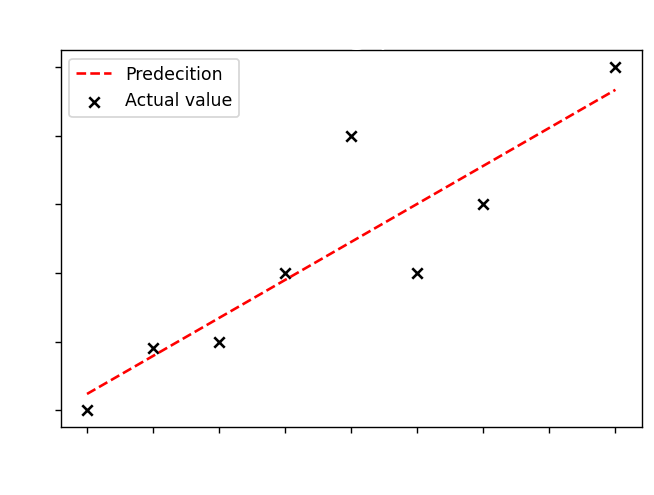

In [10]:
plt.figure(dpi= 125 )

plt.scatter(x_train, y_train,label = 'Actual value', marker='x',c= "black")
plt.plot(x_train,modle_output_predicition(x_train,w,b),linestyle= "--" ,label = 'Predecition',color = "r")


plt.title("Housing price",fontdict={"fontname":'comic sans ms','fontsize':20},color = 'white')
plt.xlabel('Size (1000 sqft)',c = 'w')
plt.ylabel('Price (in 1000s of dollars)',c = 'w')
plt.xticks(c = 'w')
plt.yticks(c = 'w')
plt.legend()
plt.show()

# ploting Cost function J(w)

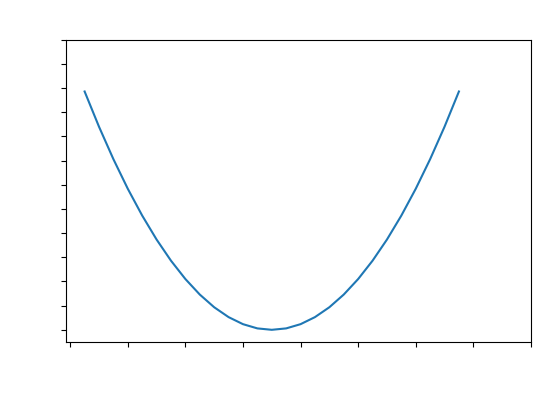

In [11]:
# note here b is alwayse zero so cost function is a function of w 
x = [1,2,3]
y = [1,2,3]
J_w = []
w = []
for i in np.arange(-5.5,8,0.5):
    w.append(i)
    w_= i
    b_ = 0
    J_w.append(cost_function(x,y,w_,b_))
    
plt.figure(dpi=100)
plt.plot(w,J_w)
plt.title("Cost function F(w)",fontdict={"fontname":'comic sans ms',"fontsize":20},color= "w")
plt.xlabel("x",color= "w")
plt.ylabel("J(w)",color= "w")
plt.xticks([-6,-4,-2,0,2,4,6,8,10],color = "w")
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120],color = "w")
plt.show()


# ploting Cost function J(w,b)

<IPython.core.display.Javascript object>


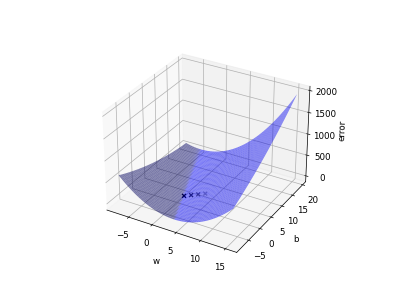

In [12]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
x = x_train
y = y_train
w = np.arange(-8,16,0.5)
b = np.arange(-8,20,0.5)
W,B = np.meshgrid(w,b)
zs = np.array([cost_function(x,y,wp, bp, ) for wp, bp in zip(np.ravel(W), np.ravel(B))])
Z = zs.reshape(W.shape)

fig = plt.figure(dpi = 100)
ax = fig.add_subplot( projection='3d')
ax.plot_surface(W, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)
ax.scatter( [1,2,3,4],[1,2,3,4],[1,2,3,4],marker = "x",c = "black")
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('error')

plt.show()